In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
import warnings
warnings.filterwarnings('ignore')

<p style="font-size:30px">Import and Exploring the data</p>

In [3]:
df1=pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [4]:
df1.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df1.shape

(3998, 39)

In [6]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

We will make a copy of our dataframe, so that data doesn't get lost if we drop anything unnecessary

In [7]:
df=df1.copy()

Here, we can drop the unnamed column because it doesn't look important

In [8]:
# and we will slice for the unnamed column
df=df.iloc[:,1:]

In [9]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [11]:
# number of numerical and object columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = df.select_dtypes(include=numerics)
object_df = df.select_dtypes(include=object)
print(len(numerical_df.columns),len(object_df.columns),len(df.columns))

27 9 38


In [12]:
np.round(df.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,...,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,...,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,...,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,...,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


In [13]:
df['Salary'].median()

300000.0

In [14]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

### so we don't have any null values here, but we can have dummy values

### here date are in the form of timestamp, so let's change them, and change the present in DOL to present dates, so the columns have proper date

In [15]:
df['DOL'].dtype

dtype('O')

In [16]:
import datetime as dt
df['DOJ']=pd.to_datetime(df['DOJ']).dt.date
df['DOB']=pd.to_datetime(df['DOB']).dt.date
df['DOL'].replace("present",dt.datetime.today(),inplace=True)
df['DOL']=pd.to_datetime(df['DOL']).dt.date
df['Year']=pd.to_datetime(df['DOL']).dt.year
df['Month']=pd.to_datetime(df['DOL']).dt.month
df['Day']=pd.to_datetime(df['DOL']).dt.day
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
0,203097,420000,2012-06-01,2021-11-20,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2021,11,20
1,579905,500000,2013-09-01,2021-11-20,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,2021,11,20
2,810601,325000,2014-06-01,2021-11-20,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,2021,11,20
3,267447,1100000,2011-07-01,2021-11-20,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2021,11,20
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1


### we can also see various -1 values in our dataset, its obvious that they are being written in place of NULL, so we will replace these values 

In [17]:
# count the -1 values in our city column
(df.JobCity==-1).sum()

461

### so we have 461 unknown Job cities which is a whole lot, let's replace them

In [18]:
df[df["JobCity"]==-1][["Year","Month","Designation","10percentage","12percentage","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()

,Year,Month,Designation,10percentage,12percentage,collegeGPA,Salary,Degree,Specialization,CollegeState,GraduationYear
0,2021.0,11.0,software engineer,76.0,64.0,70.0,200000.0,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,2013.0
1,NaN,NaN,NaN,78.0,66.0,72.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print((df.JobCity==-1).sum())
print(df.JobCity.value_counts())

461
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64


In [20]:
df.JobCity.replace(-1,df.JobCity.mod,inplace=True)
df.JobCity.value_counts()

Bangalore                                                                                                                                                                                                                                                                                                                                                                                              627
<bound method flex_method_SERIES.<locals>.flex_wrapper of 0              Bangalore\n1                 Indore\n2                Chennai\n3                Gurgaon\n4                Manesar\n              ...       \n3993          New Delhi \n3994           Hyderabad\n3995           Bangalore\n3996    Asifabadbanglore\n3997             Chennai\nName: JobCity, Length: 3998, dtype: object>    461
Noida                                                                                                                                                                                                             

### some of the cities are in Uppercase and some in lower case, we will turn all of them to lower case

In [21]:
df.JobCity=df.JobCity.str.lower()
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
0,203097,420000,2012-06-01,2021-11-20,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2021,11,20
1,579905,500000,2013-09-01,2021-11-20,assistant manager,indore,m,1989-10-04,85.4,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,2021,11,20
2,810601,325000,2014-06-01,2021-11-20,systems engineer,chennai,f,1992-08-03,85.0,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,2021,11,20
3,267447,1100000,2011-07-01,2021-11-20,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2021,11,20
4,343523,200000,2014-03-01,2015-03-01,get,manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1


## we have 'get' value in designation too, which need to be taken care of

In [22]:
print((df.Designation=='get').sum())

14


In [23]:
df[df["Designation"]=='get'][["Year","Month","Designation","10percentage","12percentage","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()

,Year,Month,Designation,10percentage,12percentage,collegeGPA,Salary,Degree,Specialization,CollegeState,GraduationYear
0,2021.0,11.0,get,80.0,64.20,61.00,180000.0,B.Tech/B.E.,mechanical engineering,Uttar Pradesh,2014.0
1,NaN,NaN,NaN,NaN,67.00,64.00,200000.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,72.00,65.05,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,73.40,66.67,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,73.80,67.00,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,74.40,68.00,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,74.53,71.00,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,76.00,73.00,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,76.80,73.30,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,79.90,73.90,NaN,NaN,NaN,NaN,NaN


In [24]:
df.Designation.value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [25]:
df.Designation.replace('get',df.JobCity.mod,inplace=True)
(df.Designation=='get').sum()

0

In [26]:
print((df['12board']==0).sum())
print((df['10board']==0).sum())

359
350


## we have so many 0 values in 12board and 10board column, we will replace them with mode

In [27]:
df[df["12board"]==0][["Year","Month","Designation","10percentage","12percentage","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()
df['12board'].replace(0,df['12board'].mod,inplace=True)
print((df['12board']==0).sum())

0


In [28]:
df[df["10board"]==0][["Year","Month","Designation","10percentage","12percentage","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()
df['10board'].replace(0,df['10board'].mod,inplace=True)
print((df['10board']==0).sum())

0


<p style="font-size:30px; color:red"><b>Univariate analysis</p>

skewness:  6.451081166224832
kurt:  80.92999627162538
salary:  300000.0


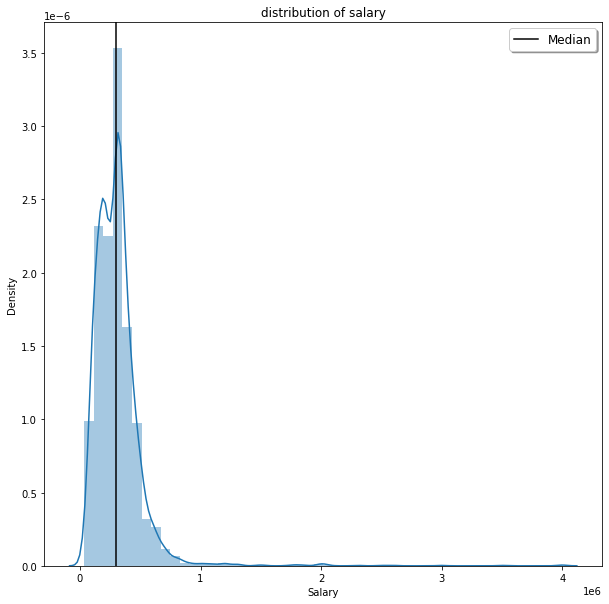

In [29]:
plt.figure(figsize=(10,10))
sns.distplot(df['Salary'])
plt.axvline(df["Salary"].median(),color='black',label="Median")
plt.title("distribution of salary")
plt.legend(shadow=True,fontsize="larger")

skew=df['Salary'].skew()
kurt=df['Salary'].kurt()

print("skewness: ",skew)
print("kurt: ",kurt)
print("salary: ",df['Salary'].median())
plt.show()

#### salary graph is highly positively skewed showing that few of the people are earning well over median salary

skewness:  6.451081166224832
kurt:  80.92999627162538
median : 79.15


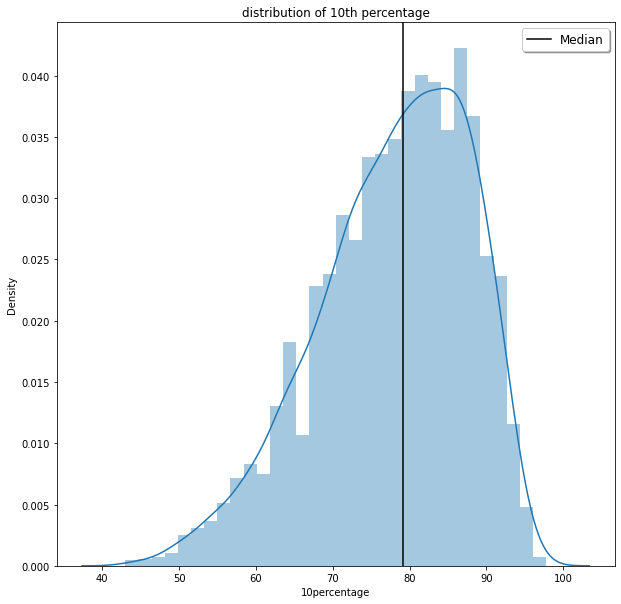

In [30]:
plt.figure(figsize=(10,10))
sns.distplot(df['10percentage'])
plt.axvline(df["10percentage"].median(),color='black',label="Median")
plt.title("distribution of 10th percentage")
plt.legend(shadow=True,fontsize="larger")

skew=df['Salary'].skew()
kurt=df['Salary'].kurt()

print("skewness: ",skew)
print("kurt: ",kurt)
print("median :",df["10percentage"].median())
plt.show()

#### class 10 graph is negatively skewed but median is high, means we have many above average students but a few very much below average too

skewness:  6.451081166224832
kurt:  80.92999627162538
median : 74.4


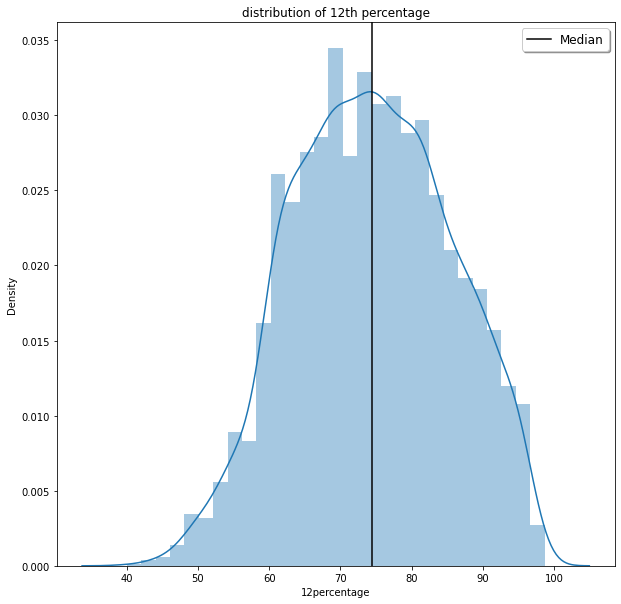

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(df['12percentage'])
plt.axvline(df["12percentage"].median(),color='black',label="Median")
plt.title("distribution of 12th percentage")
plt.legend(shadow=True,fontsize="larger")

skew=df['Salary'].skew()
kurt=df['Salary'].kurt()

print("skewness: ",skew)
print("kurt: ",kurt)
print("median :",df["12percentage"].median())
plt.show()

#### class 12 is somewhat normal but it negatively skewed

skewness:  6.451081166224832
kurt:  80.92999627162538
median : 71.72


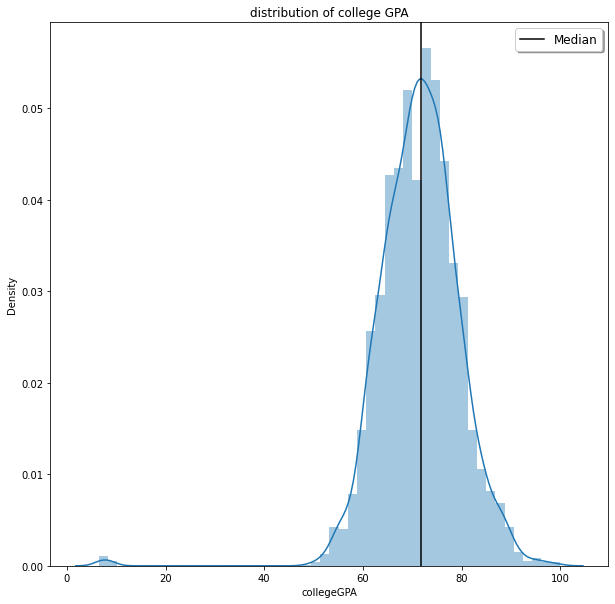

In [32]:
plt.figure(figsize=(10,10))
sns.distplot(df['collegeGPA'])
plt.axvline(df["collegeGPA"].median(),color='black',label="Median")
plt.title("distribution of college GPA")
plt.legend(shadow=True,fontsize="larger")

skew=df['Salary'].skew()
kurt=df['Salary'].kurt()

print("skewness: ",skew)
print("kurt: ",kurt)
print("median :",df["collegeGPA"].median())
plt.show()

#### this is a negatively skewed distribution

# here we can see that collegeGPA, 12 percentage and 10 percentage are similar

#### we have college ids too, which doesn't matter in analysis, so drop them

In [33]:
df.drop(['CollegeID','ID','CollegeCityID'],axis=1,inplace=True)

<AxesSubplot:>

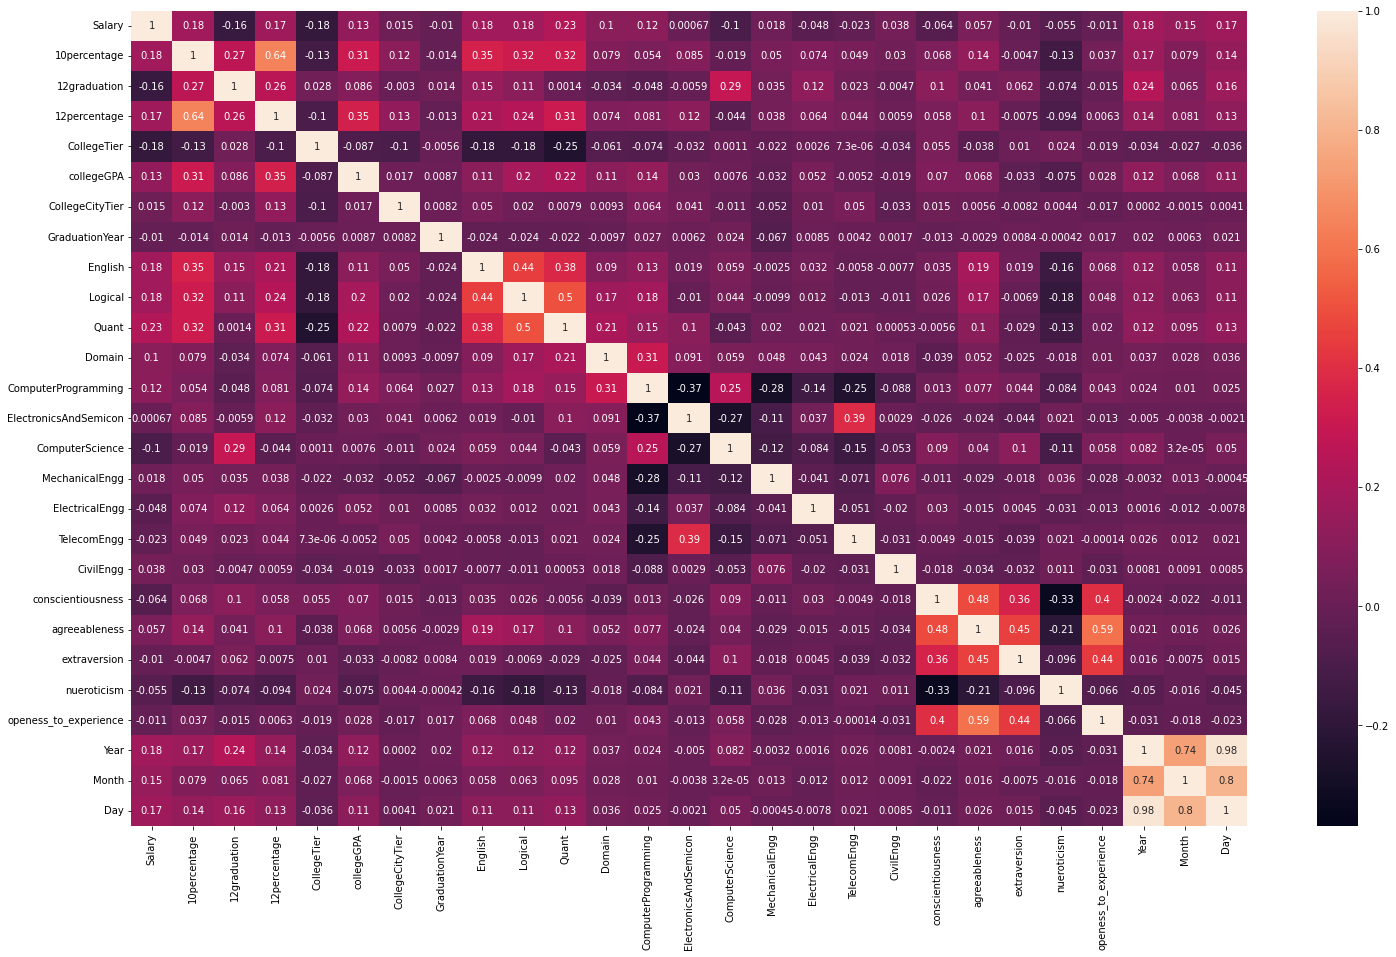

In [34]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [35]:
salaries=df['Salary'].unique()
print(len(salaries))

177


## there are 177 different salaries offered

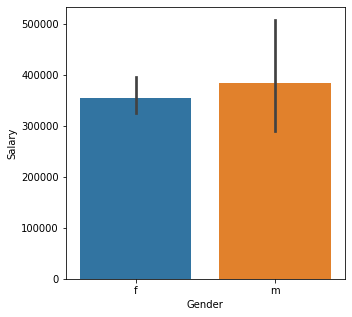

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Gender'],y=df["Salary"][:20])
plt.show()

## let's plot the most frequent jobs profession now

In [37]:
Designations_count = df.Designation.value_counts()
print(len(Designations_count))
df.Designation.value_counts()

419


software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [38]:
# most frequent designation
Designations_count[:15]

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
Name: Designation, dtype: int64

### we can see software engineer is the most frequent with a similar software developer one.

Text(0.5, 1.0, 'Preferred Jobs')

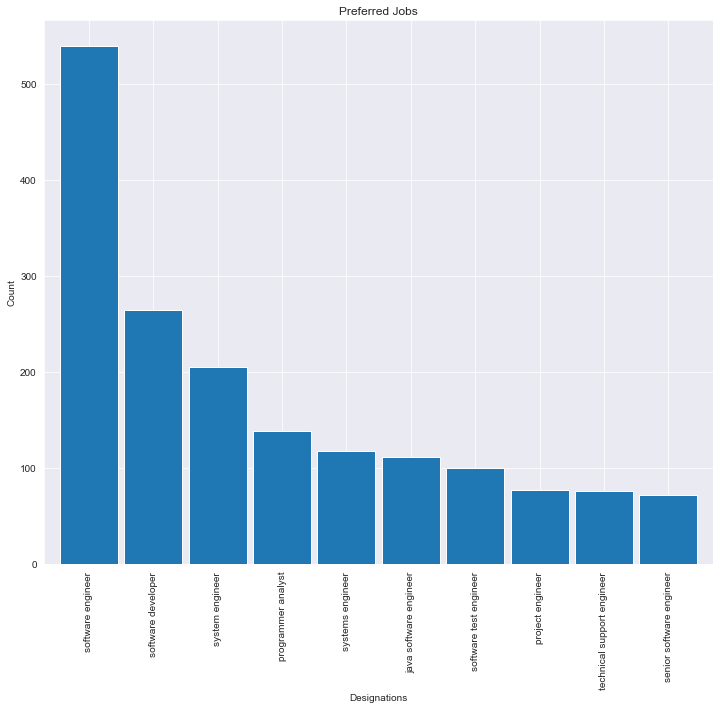

In [39]:
#Plotting the most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
Designations_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Designations')
plt.ylabel('Count')
plt.title('Preferred Jobs')

In [40]:
top_jobs=list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]

print(top_jobs)

['senior software engineer', 'automation engineer', 'assistant system engineer', 'programmer', 'application developer', 'software test engineer', 'software developer', 'software engineer trainee', 'operations analyst', 'technical lead', 'data scientist', 'it technician', 'field engineer', 'client services associate', 'salesforce developer', 'java software engineer', 'software engineer', 'sales account manager', 'junior manager', 'senior engineer']


In [41]:
describe_jobs = df[df["Designation"].isin(top_jobs)]
describe_jobs.groupby(["Designation"])["Salary"].describe().sort_values("max",ascending=False)

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
automation engineer,15.0,6.406667e+05,9.481069e+05,110000.0,307500.0,400000.0,512500.0,4000000.0
senior software engineer,72.0,5.440278e+05,4.521737e+05,215000.0,348750.0,455000.0,608750.0,4000000.0
assistant system engineer,23.0,4.823913e+05,6.583500e+05,290000.0,325000.0,350000.0,372500.0,3500000.0
programmer,36.0,3.259722e+05,4.783511e+05,60000.0,148750.0,210000.0,312500.0,3000000.0
application developer,52.0,4.190385e+05,3.878713e+05,40000.0,300000.0,350000.0,411250.0,2600000.0
software test engineer,100.0,3.374500e+05,3.051780e+05,60000.0,218750.0,300000.0,360000.0,2500000.0
software developer,265.0,2.583774e+05,1.784195e+05,50000.0,145000.0,240000.0,340000.0,2300000.0
software engineer trainee,3.0,7.816667e+05,1.099231e+06,105000.0,147500.0,190000.0,1120000.0,2050000.0
operations analyst,12.0,4.437500e+05,5.075302e+05,145000.0,247500.0,290000.0,415000.0,2020000.0


### now we will talk about the preferred cities, it is evident that bangalore is most preferred due to above calculations

In [42]:
job_cities = df["JobCity"].value_counts()
print(job_cities)

bangalore           647
noida               386
hyderabad           357
pune                320
chennai             304
                   ... 
daman and diu         1
una                   1
salem                 1
gandhinagar           1
asifabadbanglore      1
Name: JobCity, Length: 261, dtype: int64


# these are the highest paying cities

In [43]:
top_cities=df.sort_values("Salary",ascending=False)["JobCity"].unique()[:20]
print(top_cities)

['new delhi' 'gurgaon' 'pune' nan 'kalmar, sweden' 'noida' 'bangalore'
 'london' 'mumbai' 'panchkula' 'johannesburg' 'hyderabad' 'dubai' 'angul'
 'bhopal' 'maharajganj' 'bangalore ' 'greater noida' 'vadodara'
 'muzaffarpur']


In [44]:
describe_cities = df[df["JobCity"].isin(top_jobs)]
print(describe_cities.Designation)

Series([], Name: Designation, dtype: object)


In [45]:
cities_count = df.JobCity.value_counts()

Text(0.5, 1.0, 'Preferred Jobs')

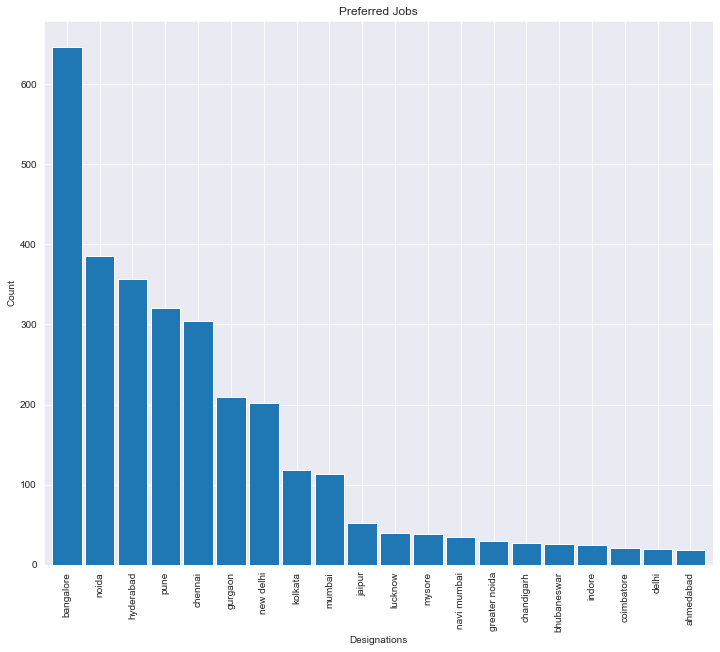

In [46]:
#Plotting the most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
cities_count[:20].plot(kind='bar' , width=0.9)
plt.xlabel('Designations')
plt.ylabel('Count')
plt.title('Preferred Jobs')

### this shows that bangalore has the highest count of people working there

## let's talk about gender

In [47]:
df["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

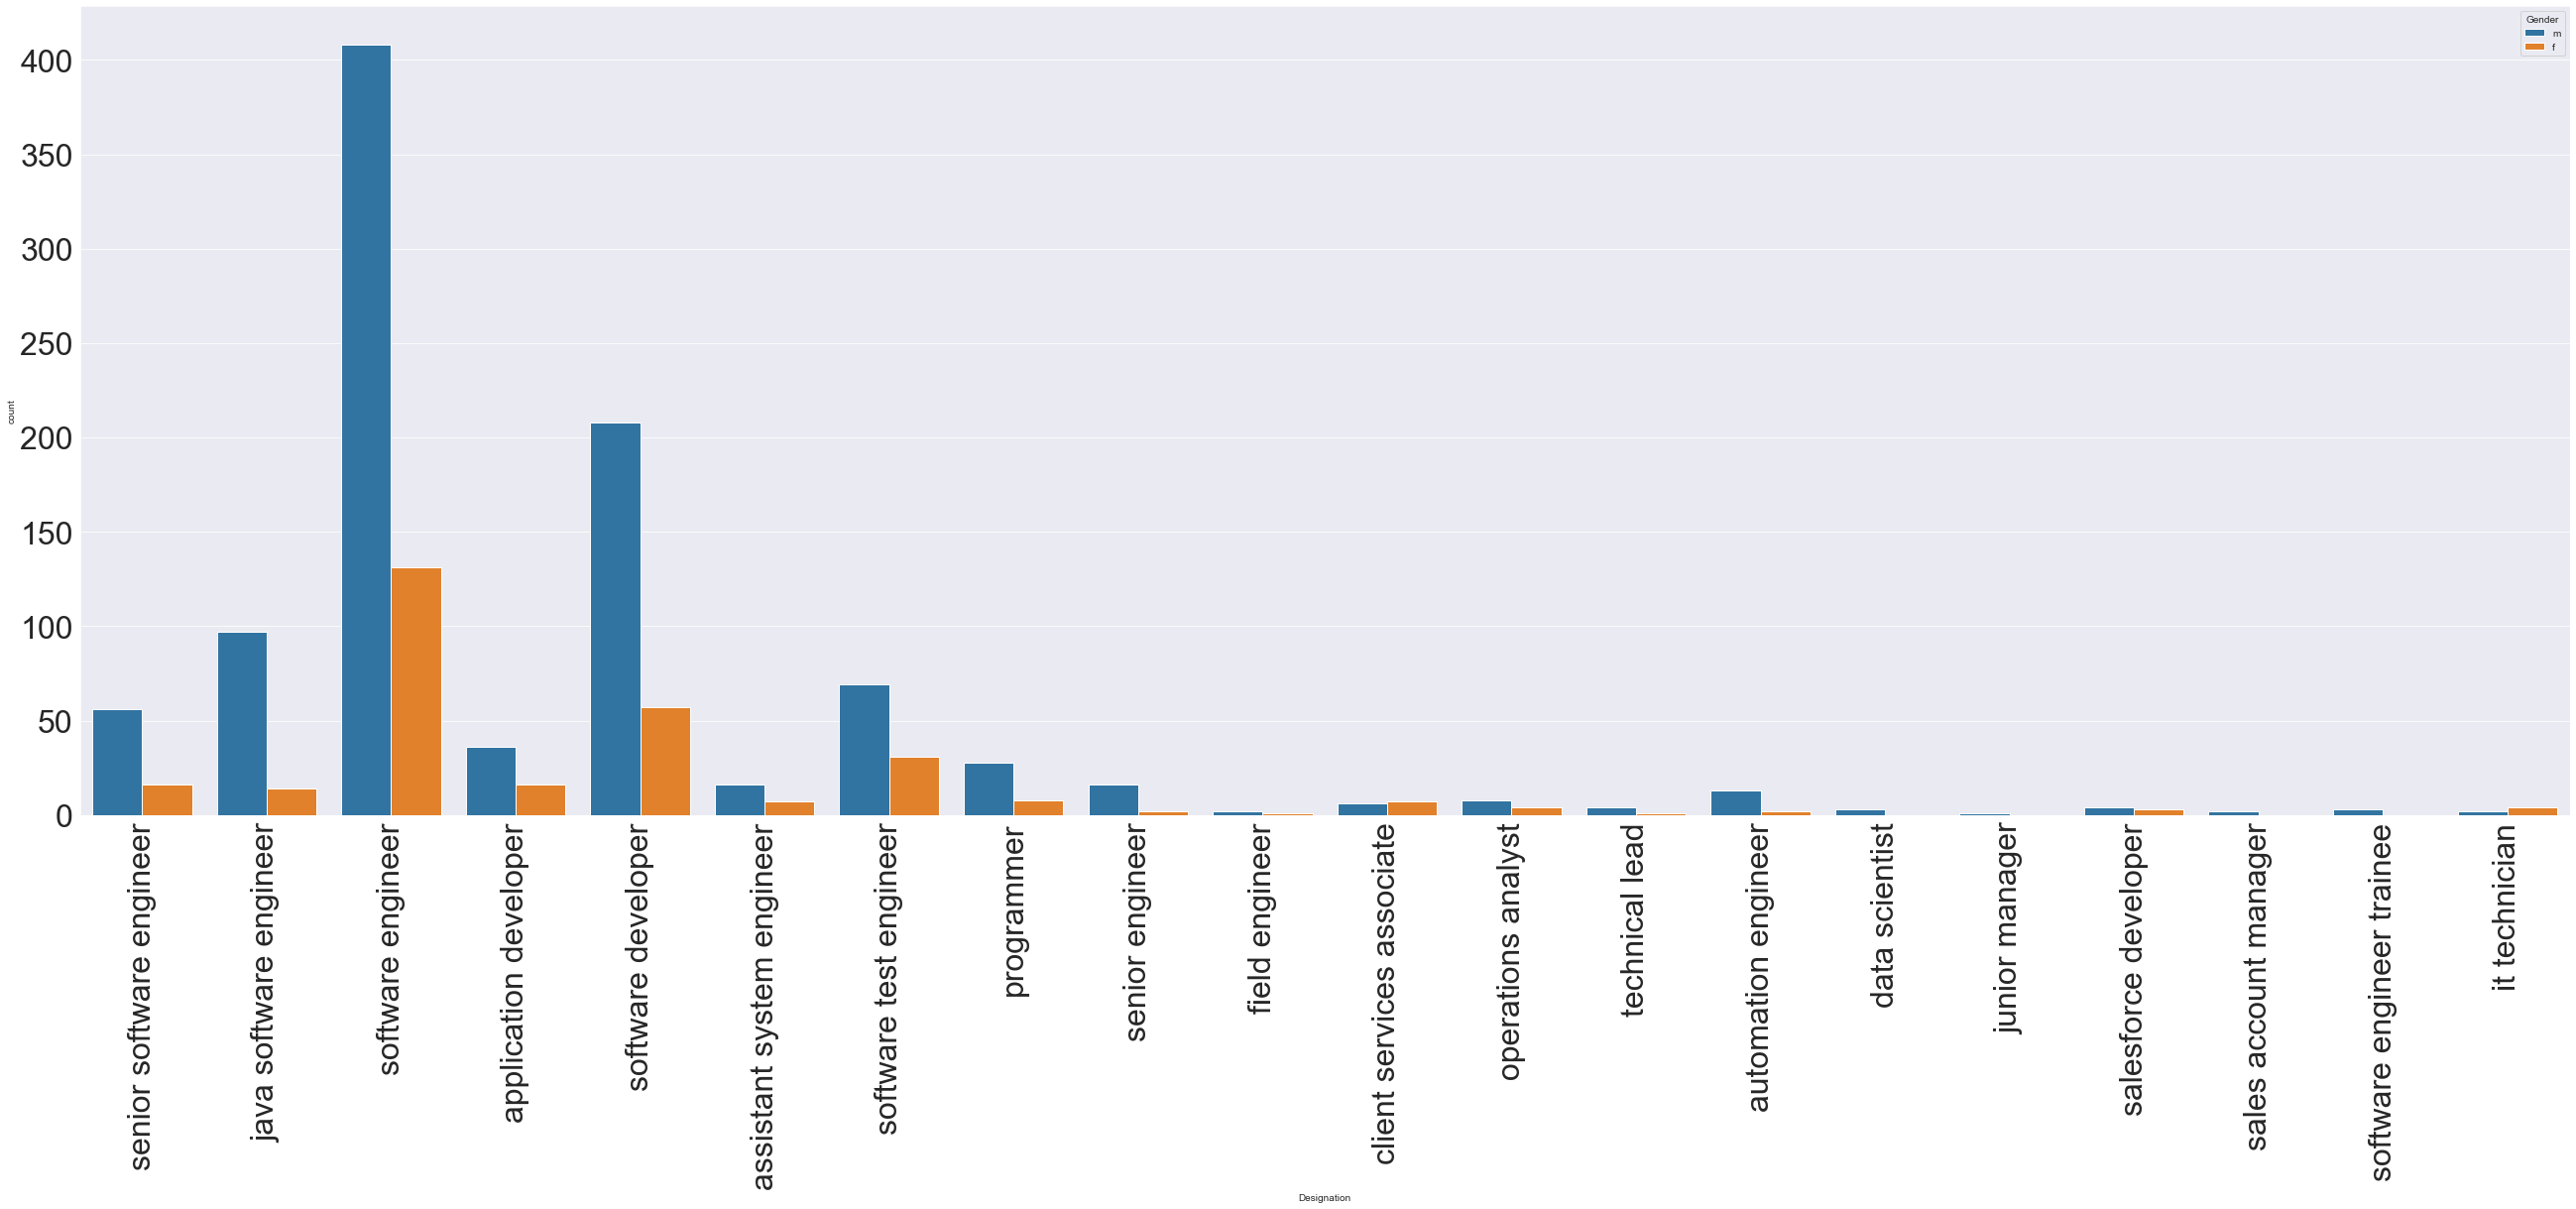

In [48]:
plt.figure(figsize=(45,15))
sns.countplot(x="Designation",hue="Gender",data=describe_jobs)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

#### as expected, male have a very high job count across all the jobs

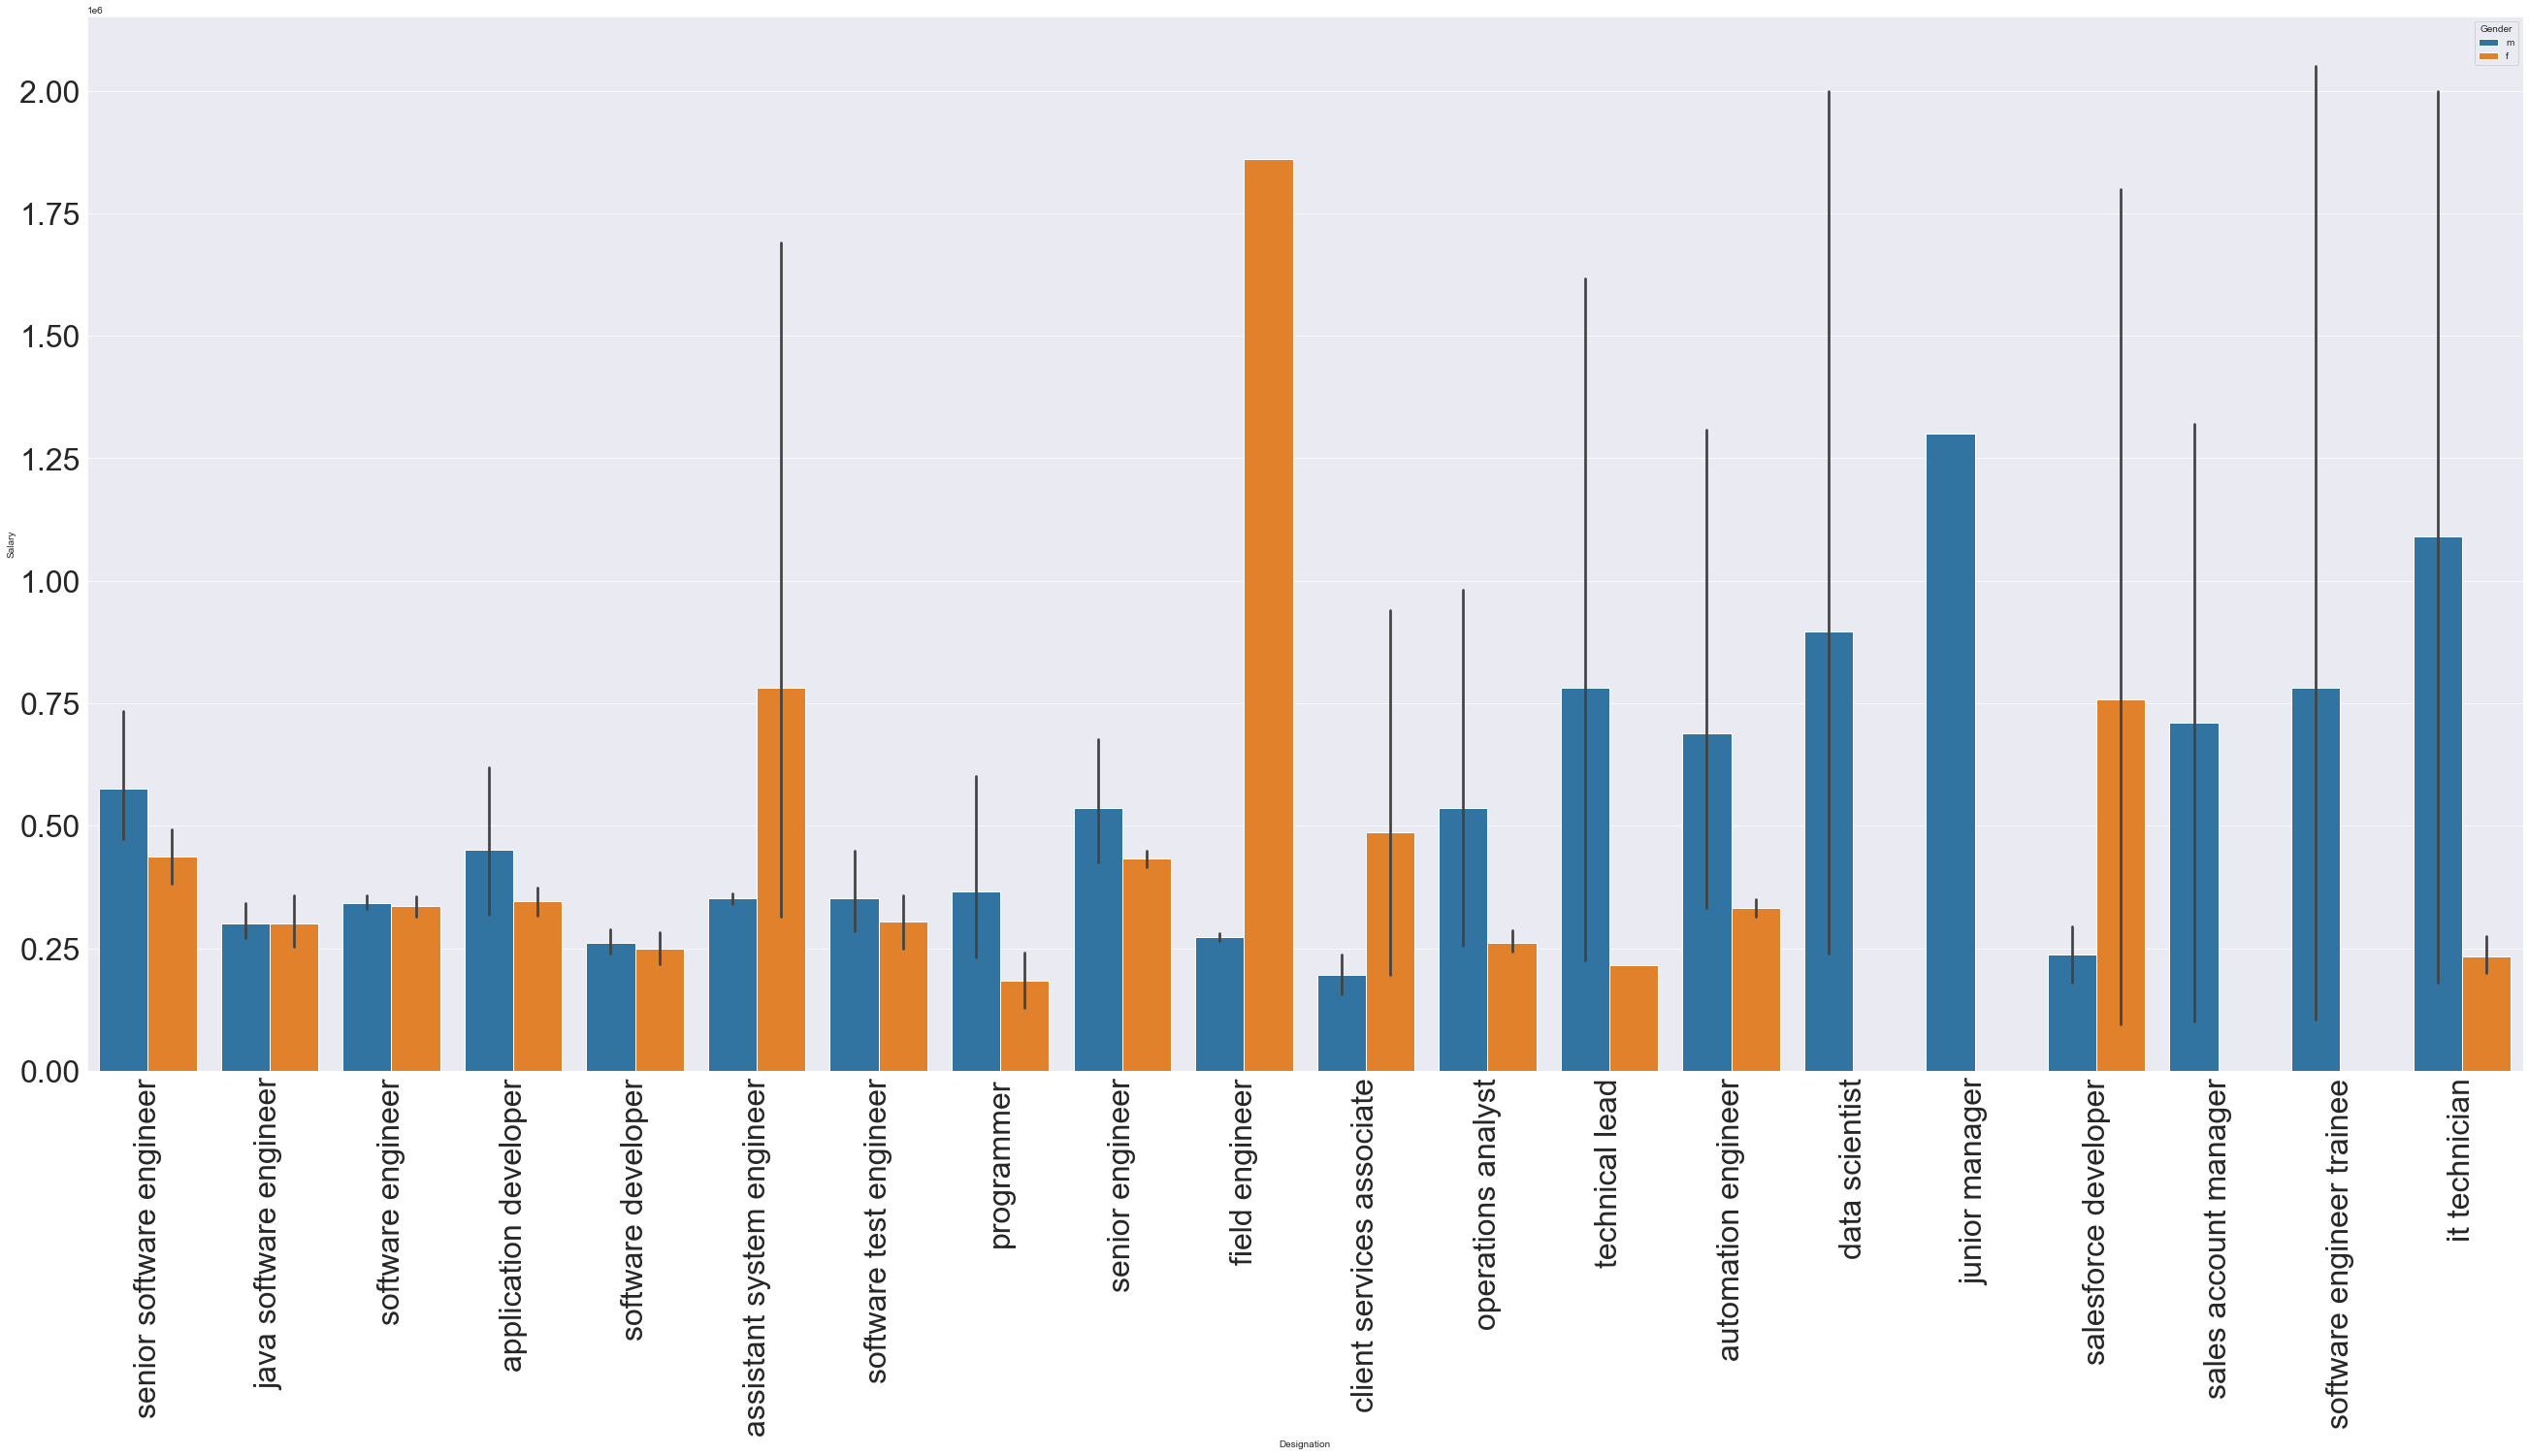

In [49]:
plt.figure(figsize=(45,20))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=describe_jobs)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)
plt.show()

#### eventhough the number of female to male is less, they are paid correctly, with some amount of differnce might be due to experience

### specialisation and degrees

In [50]:
degrees = df["Degree"].unique()
degrees

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [51]:
degree_count = df.Degree.value_counts()
degree_count

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

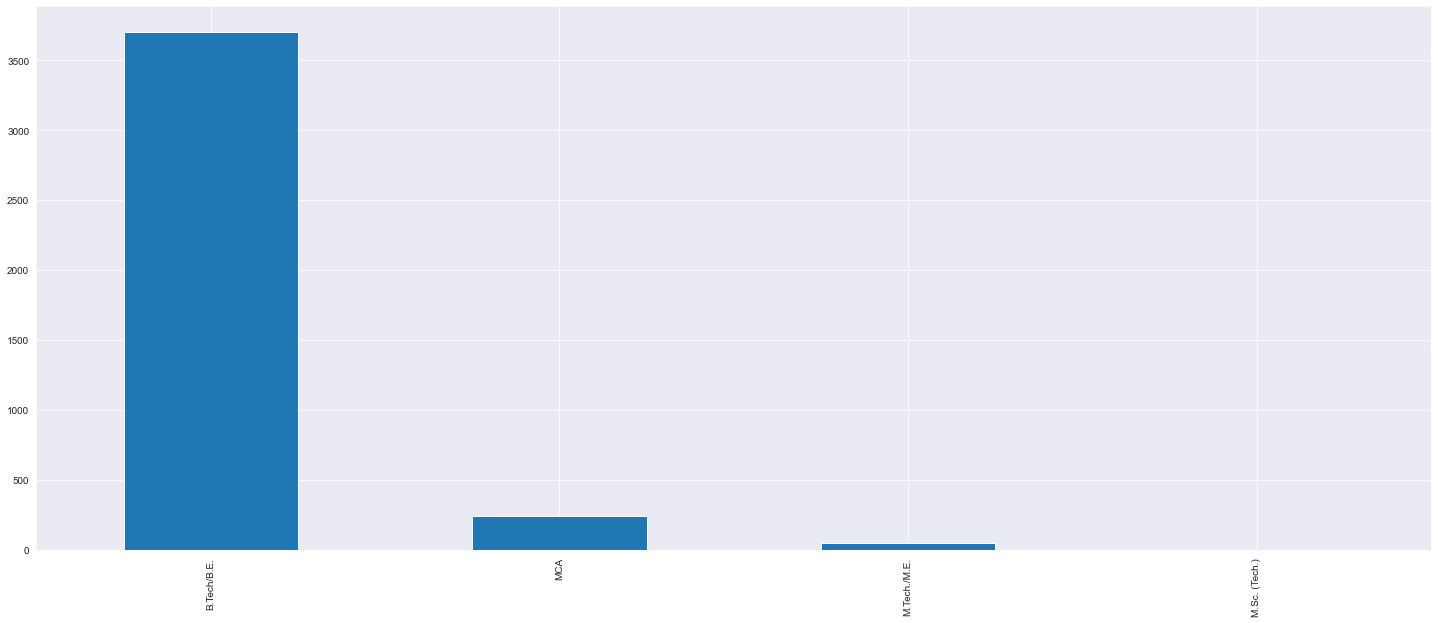

In [52]:
plt.figure(figsize=(25,10))
degree_count.plot(kind="bar")
plt.show()

#### this explains that most of the candidates pursued btech followed by MCA and Mtech

#### let's see about the specialisation

In [53]:
specialisations=df["Specialization"].value_counts()
specialisations

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

#### here electrical and communication is the most sought after specialization eventhough most jobs are in sector of computers

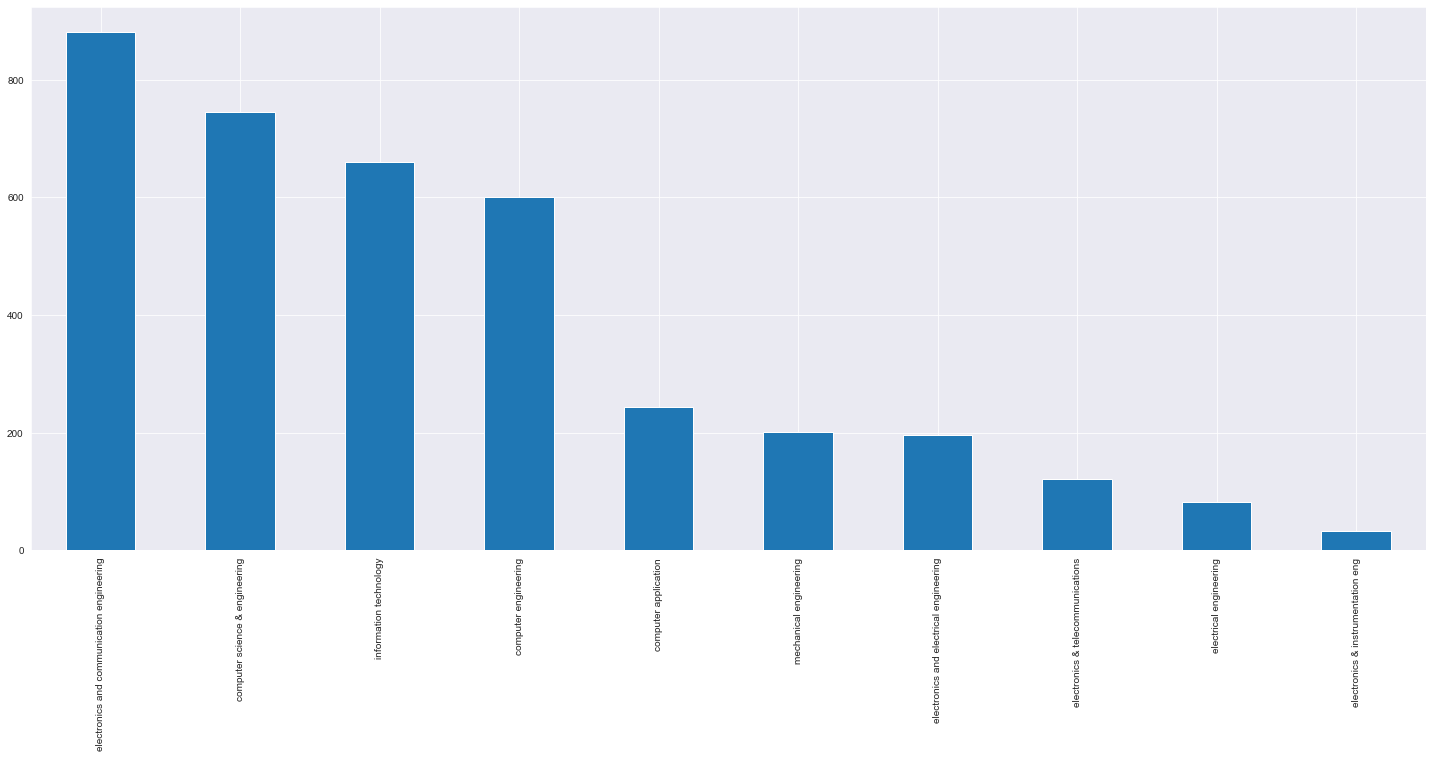

In [54]:
plt.figure(figsize=(25,10))
specialisations[:10].plot(kind="bar")
plt.show()

#### eventhough electrical and communication engineering is the most frequenct, Computer Science and Engineering, Information Technology, computer engineering and computer application are related, and we have most computer jobs too

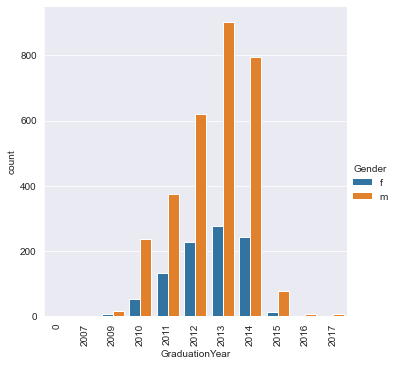

In [55]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

#### 

#### Due to such high amount of males, its obvious that we have more males graduating that females here.

** now I will study for outliers

<AxesSubplot:xlabel='10percentage'>

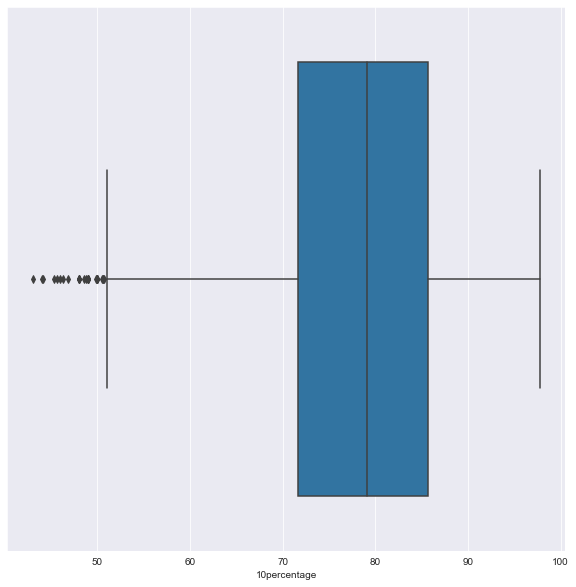

In [56]:
# for salary column
plt.figure(figsize=(10,10))
sns.boxplot(df["10percentage"])